# Proyek Analisis Data: Nama dataset
- Nama: Faqih Suryana
- Email: faqihsuryana148@gmail.com
- Id Dicoding:faqih_suryana_NURk

## Menentukan Pertanyaan Bisnis

### 1.Bagaimana pengaruh Holiday atau Tidak dalam penggunaan Sepeda
### 2.Apakah Pengaruh Season Mempengaruhi penggunaan Bike  

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_data = pd.read_csv("https://raw.githubusercontent.com/Faqih26/dicoding/main/Bike-sharing-dataset/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_data = pd.read_csv("https://raw.githubusercontent.com/Faqih26/dicoding/main/Bike-sharing-dataset/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

semua kolom dan datatype pada dataset day_data sudah benar kecuali dteday

In [4]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat duplikasi pada dataset day_data



In [6]:
day_data.duplicated().sum()

0

tidak ditemukan hal yang tidak sesuai dengan statistik yang ditampilkan berdasarkan day_data


In [7]:
day_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


semua kolom dan datatype pada dataset hour_data sudah benar kecuali dteday

In [8]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat duplikasi pada dataset hour_data


In [10]:
hour_data.duplicated().sum()

0

tidak ditemukan hal yang tidak sesuai dengan statistik yang ditampilkan berdasarkan hour_data

In [11]:
hour_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


### Cleaning Data

Memperbaiki type data pada kedua dataset pada kolom dteday yang sebelumnya object menjadi datetime

In [12]:
day_data["dteday"] = pd.to_datetime(day_data["dteday"])
hour_data["dteday"] = pd.to_datetime(hour_data["dteday"])

mengecek kembali tipe data yang sudah diperbaiki

In [13]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

mengubah data pada dataset day_data pada kolom season dimana


 1 = Musim Semi
 2 = Musim Panas
 3 = Musim Gugur
 4 = Musim Salju








In [15]:
day_data.loc[day_data["season"] == 1, "season"] = "Semi"
day_data.loc[day_data["season"] == 2, "season"] = "Panas"
day_data.loc[day_data["season"] == 3, "season"] = "Gugur"
day_data.loc[day_data["season"] == 4, "season"] = "Salju"

day_data.season.value_counts()

Gugur    188
Panas    184
Semi     181
Salju    178
Name: season, dtype: int64

In [16]:
hour_data.loc[hour_data["season"] == 1, "season"] = "Spring"
hour_data.loc[hour_data["season"] == 2, "season"] = "Summer"
hour_data.loc[hour_data["season"] == 3, "season"] = "Fall"
hour_data.loc[hour_data["season"] == 4, "season"] = "Winter"


hour_data.season.value_counts()

Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: season, dtype: int64

mengubah isi data pada dataset day_data dan hour_data pada kolom yr dimana


 0 = 2011
 1 = 2012

In [17]:
hour_data.loc[hour_data["yr"] == 0, "yr"] = 2011
hour_data.loc[hour_data["yr"] == 1, "yr"] = 2012
day_data.loc[day_data["yr"] == 0, "yr"] = 2011
day_data.loc[day_data["yr"] == 1, "yr"] = 2012

print("day Dataset")
day_data.yr.value_counts()
print("hour Dataset")
hour_data.yr.value_counts()

day Dataset
hour Dataset


2012    8734
2011    8645
Name: yr, dtype: int64

In [18]:
day_data.loc[day_data["holiday"] == 0, "holiday"] = "Holiday"
day_data.loc[day_data["holiday"] == 1, "holiday"] = "Not a Holiday"
hour_data.loc[hour_data["holiday"] == 0, "holiday"] = "Holiday"
hour_data.loc[hour_data["holiday"] == 1, "holiday"] = "Not a Holiday"

print("day Dataset")
day_data.holiday.value_counts().sort_index()


day Dataset


Holiday          710
Not a Holiday     21
Name: holiday, dtype: int64

In [19]:
print("hour Dataset")
hour_data.holiday.value_counts().sort_index()

hour Dataset


Holiday          16879
Not a Holiday      500
Name: holiday, dtype: int64

In [20]:
weekday_names = {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}

day_data["weekday"] = day_data["weekday"].replace(weekday_names)
hour_data["weekday"] = hour_data["weekday"].replace(weekday_names)

day_data.weekday.value_counts().sort_index()

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

In [21]:
hour_data.weekday.value_counts().sort_index()

Fri    2487
Mon    2479
Sat    2512
Sun    2502
Thu    2471
Tue    2453
Wed    2475
Name: weekday, dtype: int64

In [22]:
def get_time_of_day(hour):
    # check the hour value and return the corresponding time of day
    if hour < 6:
        return "Night"
    elif hour < 12:
        return "Morning"
    elif hour < 18:
        return "Afternoon"
    else:
        return "Evening"

In [23]:
hour_data['time_of_day'] = hour_data['hr'].apply(get_time_of_day)
hour_data.time_of_day.value_counts()

Afternoon    4375
Evening      4368
Morning      4360
Night        4276
Name: time_of_day, dtype: int64

In [24]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [25]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  object        
 3   yr           17379 non-null  int64         
 4   mnth         17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  object        
 7   weekday      17379 non-null  object        
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

In [26]:
weathername = {1: "Clear", 2: "Mist + Cloudy", 3: "Light Snow", 4: "Heavy Rain"}

day_data["weathersit"] = day_data["weathersit"].replace(weathername)
hour_data["weathersit"] = hour_data["weathersit"].replace(weathername)

day_data.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

In [27]:
hour_data.weathersit.value_counts().sort_index()

Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: weathersit, dtype: int64

pengubahan data dilakukan untuk memudahkan pemahaman akan data

In [29]:
day_data.corr()

<ipython-input-29-b39b893bcbbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day_data.corr()


,instant,yr,mnth,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866025,0.496702,-0.004337,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
yr,0.866025,1.000000,-0.001792,-0.002013,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,-0.001792,1.000000,-0.005901,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
workingday,-0.004337,-0.002013,-0.005901,1.000000,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
temp,0.150580,0.047604,0.220205,0.052660,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.046106,0.227459,0.052182,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.110651,0.222204,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.011817,-0.207502,-0.018796,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.248546,0.123006,-0.518044,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.594248,0.293488,0.303907,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517


In [30]:
corr = day_data.select_dtypes('number').corr()

In [31]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '1000px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,instant,yr,mnth,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000,0.866,0.497,-0.004,0.151,0.153,0.016,-0.113,0.275,0.660,0.629
yr,0.866,1.000,-0.002,-0.002,0.048,0.046,-0.111,-0.012,0.249,0.594,0.567
mnth,0.497,-0.002,1.000,-0.006,0.220,0.227,0.222,-0.208,0.123,0.293,0.280
workingday,-0.004,-0.002,-0.006,1.000,0.053,0.052,0.024,-0.019,-0.518,0.304,0.061
temp,0.151,0.048,0.220,0.053,1.000,0.992,0.127,-0.158,0.543,0.540,0.627
atemp,0.153,0.046,0.227,0.052,0.992,1.000,0.140,-0.184,0.544,0.544,0.631
hum,0.016,-0.111,0.222,0.024,0.127,0.140,1.000,-0.248,-0.077,-0.091,-0.101
windspeed,-0.113,-0.012,-0.208,-0.019,-0.158,-0.184,-0.248,1.000,-0.168,-0.217,-0.235
casual,0.275,0.249,0.123,-0.518,0.543,0.544,-0.077,-0.168,1.000,0.395,0.673
registered,0.660,0.594,0.293,0.304,0.540,0.544,-0.091,-0.217,0.395,1.000,0.946


In [32]:
day_data.to_csv("cleandataday.csv", index=False)

In [33]:
hour_data.to_csv("cleanhourdata.csv", index=False)

### Explore Hour_data

In [62]:
hour_data['time_of_day'].value_counts()

Afternoon    4375
Evening      4368
Morning      4360
Night        4276
Name: time_of_day, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

## 1.Bagaimana pengaruh Holiday atau Tidak dalam penggunaan Sepeda

In [36]:
holiday_day_data = day_data.groupby(by="holiday").instant.nunique().reset_index()
holiday_day_data.rename(columns={
    "instant": "sum"
}, inplace=True)
holiday_day_data

,holiday,sum
0,Holiday,710
1,Not a Holiday,21


In [37]:
holiday_hour_data = hour_data.groupby(by="holiday").instant.nunique().reset_index()
holiday_hour_data.rename(columns={
    "instant": "sum"
}, inplace=True)
holiday_hour_data

,holiday,sum
0,Holiday,16879
1,Not a Holiday,500


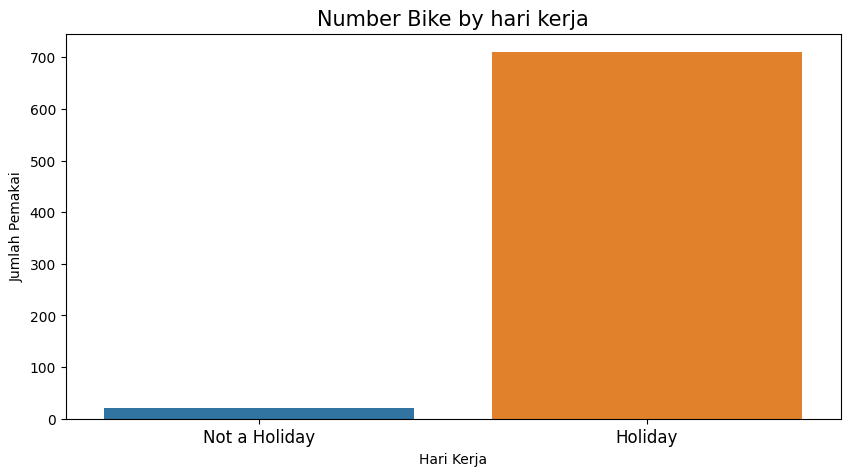

In [38]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="holiday",
    data=holiday_day_data.sort_values(by="holiday", ascending=False),
)
plt.title("Number Bike by hari kerja", loc="center", fontsize=15)
plt.ylabel("Jumlah Pemakai")
plt.xlabel("Hari Kerja")
plt.tick_params(axis="x", labelsize=12)
plt.show()

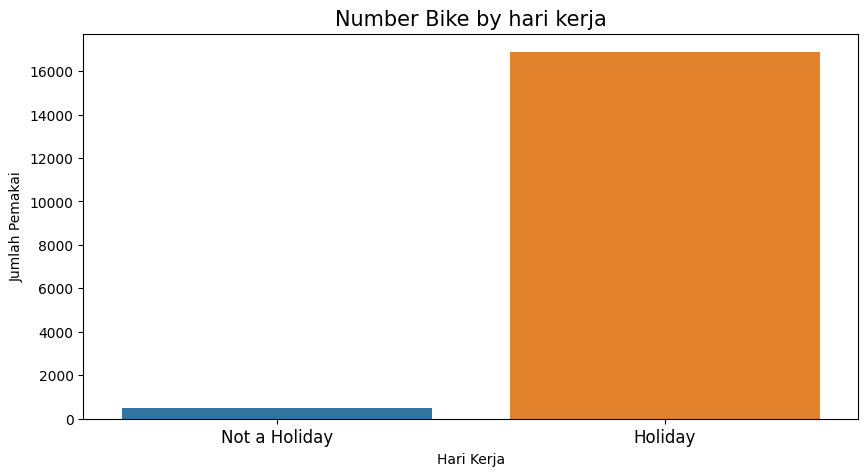

In [39]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="holiday",
    data=holiday_hour_data.sort_values(by="holiday", ascending=False),
)
plt.title("Number Bike by hari kerja", loc="center", fontsize=15)
plt.ylabel("Jumlah Pemakai")
plt.xlabel("Hari Kerja")
plt.tick_params(axis="x", labelsize=12)
plt.show()


### Berdasarkan Analisis Sebelumnya ditemukan bahwa hari libur merupakan hari dimana pengguna sepeda paling banyak, berdasarkan hal itu maka akan di identifikasi jam berapa saja penggunaan sepeda paling banyak

In [40]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [41]:
holiday_hour  = hour_data[hour_data['holiday']=='Holiday']

In [42]:
holiday_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16879 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      16879 non-null  int64         
 1   dteday       16879 non-null  datetime64[ns]
 2   season       16879 non-null  object        
 3   yr           16879 non-null  int64         
 4   mnth         16879 non-null  int64         
 5   hr           16879 non-null  int64         
 6   holiday      16879 non-null  object        
 7   weekday      16879 non-null  object        
 8   workingday   16879 non-null  int64         
 9   weathersit   16879 non-null  object        
 10  temp         16879 non-null  float64       
 11  atemp        16879 non-null  float64       
 12  hum          16879 non-null  float64       
 13  windspeed    16879 non-null  float64       
 14  casual       16879 non-null  int64         
 15  registered   16879 non-null  int64         
 16  cnt 

In [43]:
holiday_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_of_day
0,1,2011-01-01,Spring,2011,1,0,Holiday,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,Night
1,2,2011-01-01,Spring,2011,1,1,Holiday,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,Night
2,3,2011-01-01,Spring,2011,1,2,Holiday,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,Night
3,4,2011-01-01,Spring,2011,1,3,Holiday,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,Night
4,5,2011-01-01,Spring,2011,1,4,Holiday,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,Night


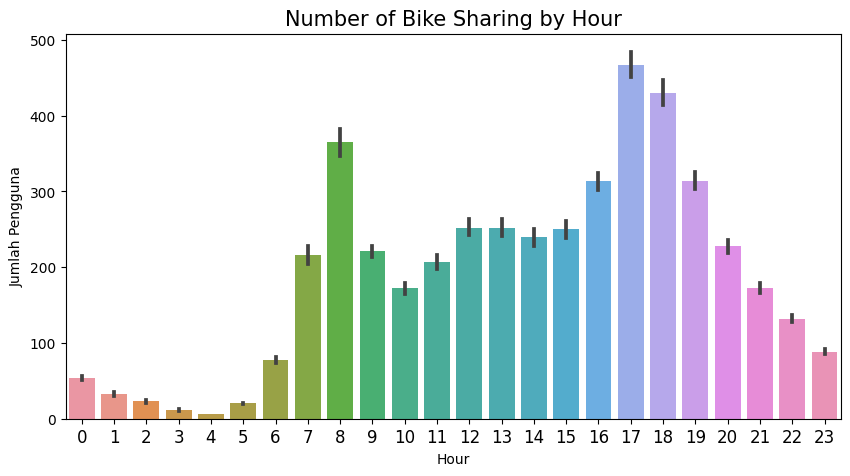

In [44]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="hr",
    data=holiday_hour.sort_values(by="hr", ascending=False),
)
plt.title("Number of Bike Sharing by Hour", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Hour")
plt.tick_params(axis="x", labelsize=12)
plt.show()

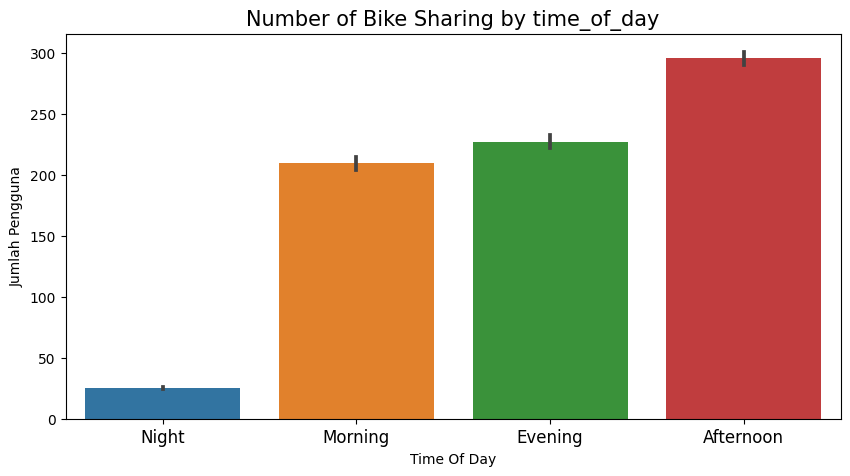

In [49]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="time_of_day",
    data=holiday_hour.sort_values(by="time_of_day", ascending=False),
)
plt.title("Number of Bike Sharing by time_of_day", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Time Of Day")
plt.tick_params(axis="x", labelsize=12)
plt.show()

Dengan analisa diatas ditemukan bahwa malam hari adalah waktu paling banyak pengguna sepeda paling banyak

In [53]:
holiday_timeday  = holiday_hour[hour_data['time_of_day']=='Afternoon']
holiday_timeday

<ipython-input-53-21db57514d5e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  holiday_timeday  = holiday_hour[hour_data['time_of_day']=='Afternoon']


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_of_day
12,13,2011-01-01,Spring,2011,1,12,Holiday,Sat,0,Clear,0.42,0.4242,0.77,0.2836,29,55,84,Afternoon
13,14,2011-01-01,Spring,2011,1,13,Holiday,Sat,0,Mist + Cloudy,0.46,0.4545,0.72,0.2985,47,47,94,Afternoon
14,15,2011-01-01,Spring,2011,1,14,Holiday,Sat,0,Mist + Cloudy,0.46,0.4545,0.72,0.2836,35,71,106,Afternoon
15,16,2011-01-01,Spring,2011,1,15,Holiday,Sat,0,Mist + Cloudy,0.44,0.4394,0.77,0.2985,40,70,110,Afternoon
16,17,2011-01-01,Spring,2011,1,16,Holiday,Sat,0,Mist + Cloudy,0.42,0.4242,0.82,0.2985,41,52,93,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17368,17369,2012-12-31,Spring,2012,12,13,Holiday,Mon,1,Mist + Cloudy,0.26,0.2576,0.44,0.1642,38,165,203,Afternoon
17369,17370,2012-12-31,Spring,2012,12,14,Holiday,Mon,1,Mist + Cloudy,0.28,0.2727,0.45,0.2239,62,185,247,Afternoon
17370,17371,2012-12-31,Spring,2012,12,15,Holiday,Mon,1,Mist + Cloudy,0.28,0.2879,0.45,0.1343,69,246,315,Afternoon
17371,17372,2012-12-31,Spring,2012,12,16,Holiday,Mon,1,Mist + Cloudy,0.26,0.2576,0.48,0.1940,30,184,214,Afternoon


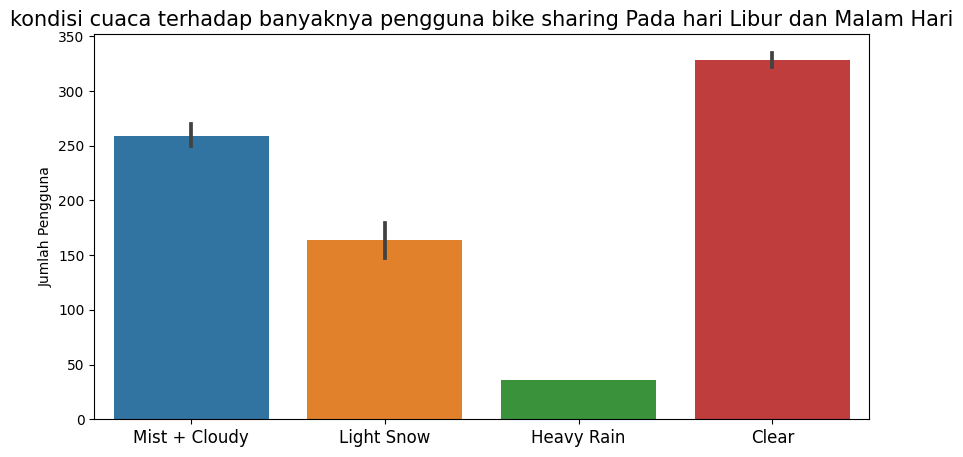

In [55]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="weathersit",
    data=holiday_timeday.sort_values(by="weathersit", ascending=False),
)
plt.title("kondisi cuaca terhadap banyaknya pengguna bike sharing Pada hari Libur dan Malam Hari", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Pertanyaan 2:

## 2.Apakah Pengaruh Season Mempengaruhi penggunaan Bike  


In [59]:
season_data = day_data.groupby(by="season").instant.nunique().reset_index()
season_data.rename(columns={
    "instant": "sum"
}, inplace=True)
season_data

,season,sum
0,Gugur,188
1,Panas,184
2,Salju,178
3,Semi,181


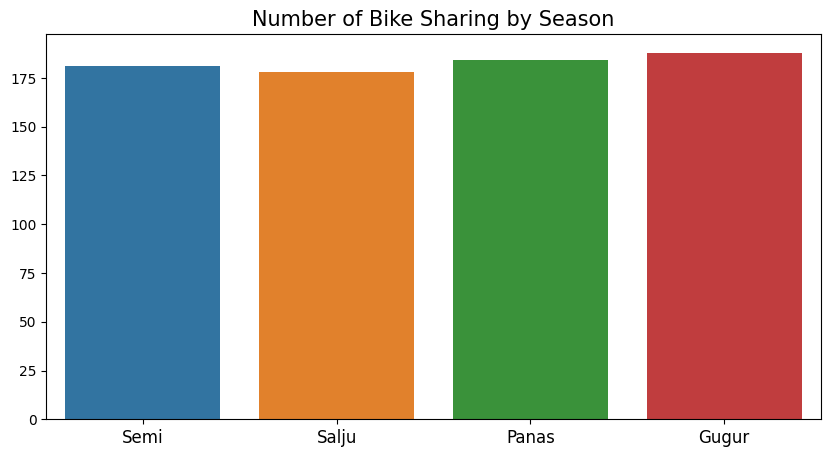

In [60]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="season",
    data=season_data.sort_values(by="season", ascending=False),
)
plt.title("Number of Bike Sharing by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

## Conclusion



1.   Berdasarkan Analisis pada pertanyaan pertama ditemukan bahwa penggunaan sepeda paling banyak digunakan pada hari libur, Salah satu kemungkinan penyebab perbedaan tersebut adalah bahwa pada hari libur, orang-orang memiliki lebih banyak waktu luang dan kesempatan untuk berolahraga, bersantai, atau menjelajahi kota dengan menggunakan sepeda. Sedangkan pada hari biasa, orang-orang mungkin lebih sibuk dengan pekerjaan, sekolah, atau kegiatan lainnya yang mengurangi waktu dan motivasi mereka untuk menggunakan sepeda.Berdasarkan analisis diatas maka akan di identifikasi jam berapa saja yang menunjukan penggunaan sepeda paling banyak dan ditemukan jam 17-18 adalah jam yang paling banyak digunakan berdasarkan hal itu, adapun **saran** yang dapat diberikan yaitu memberikan fasilitas seperti helm, lampu, atau kunci. Hal ini dapat mengurangi risiko kecelakaan, pencurian, atau kerusakan sepeda.
Lalu berdasarkan analisis lanjutan pada cuaca cerah dan berawan lebih banyak mendatangkan pengguna berdasarkan hal itu dapat diberikan insentif atau diskon bagi pengguna sepeda pada cuaca tersebut, untuk mendorong penggunaan sepeda yang lebih efisien dan ramah lingkungan. Hal ini dapat dilakukan dengan memberikan poin, kupon, atau hadiah bagi pengguna sepeda yang sering atau lama menggunakan sepeda.

2.   Pada Analisa pengguna sepeda berdasarkan season ditemukan bahwa cuaca tidak terlalu mempengaruhi pengguna sepeda



### Korelasi Antar Kolom


*   Kolom temp dan atemp memiliki korelasi yang sangat tinggi (0.991702), yang berarti bahwa mereka hampir sama dalam mengukur suhu udara. Ini masuk akal karena temp adalah suhu aktual dan atemp adalah suhu yang dirasakan oleh pengguna.



*   Kolom casual dan workingday memiliki korelasi yang sangat rendah (-0.518044), yang berarti bahwa mereka memiliki hubungan negatif yang cukup kuat. Ini berarti bahwa permintaan sepeda dari pengguna kasual cenderung lebih rendah pada hari kerja dan lebih tinggi pada akhir pekan atau hari libur.
*   Kolom registered dan cnt memiliki korelasi yang sangat tinggi (0.945517), yang berarti bahwa mereka memiliki hubungan positif yang sangat kuat. Ini berarti bahwa permintaan sepeda secara keseluruhan didominasi oleh pengguna terdaftar, yang lebih stabil dan dapat diprediksi daripada pengguna kasual.

*   Kolom windspeed dan hum memiliki korelasi yang rendah dengan kolom lainnya, yang berarti bahwa mereka tidak terlalu mempengaruhi permintaan sepeda. Namun, mereka memiliki korelasi negatif dengan kolom cnt, yang berarti bahwa permintaan sepeda cenderung menurun ketika kecepatan angin atau kelembaban meningkat.



